# Курсовая работа по информатике

### Задание № 1

Метод наименьших квадратов - математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от экспериментальных входных данных. Задача МНК состоит в то, что необходимо найти такие коэффициенты линейной зависимости, при которых значение функции двух переменных будет наименьшим. 

По данным метеонаблюдений и гидрологии методом наименьших квадратов построим кривую, которая будет наилучшим образом описывать поведение исходных данных. 

In [7]:
import pandas as pd
file1 = pd.read_excel('https://github.com/DaryaKorel/MSU-2023/blob/main/MNK.xlsx', sheet_name = 'file1', engine = 'openpyxl')
print(file1.head())

BadZipFile: File is not a zip file

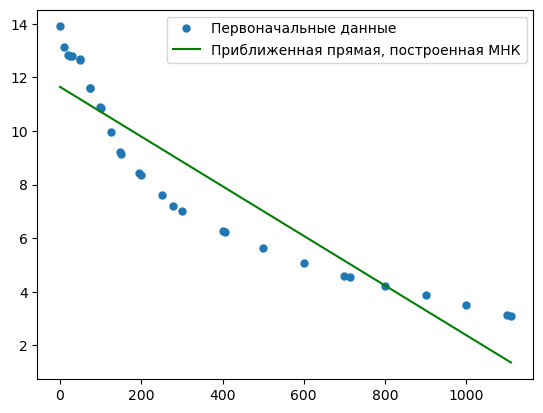

In [10]:
#import pandas as pd
#file = pd.read_excel('https://github.com/DaryaKorel/MSU-2023/blob/main/MNK.xlsx', sheet_name = 'file')
#print(file.head())
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 10, 20, 25, 30, 49, 50, 74, 75, 99, 100, 125, 148, 150, 195, 200, 
              250, 279, 300, 400, 406, 500, 600, 700, 714, 800, 900, 1000, 1100, 1110])
y = np.array([13.9, 13.13, 12.84, 12.8, 12.8, 12.7, 12.66, 11.62, 11.59, 10.89, 10.85, 
              9.96, 9.2, 9.16, 8.42, 8.34, 7.6, 7.22, 7.02, 6.27, 6.24, 5.64, 5.08, 4.6, 4.54, 4.23, 3.87, 3.51, 3.15, 3.11])

A = np.vstack([x, np.ones(len(x))]).T   # объединяем столбцы по вертикали
k, b = np.linalg.lstsq(A, y, rcond=None)[0] # строим МНК

f = plt.plot(x, y, 'o', label='Первоначальные данные', markersize=5)  # строим график
f = plt.plot(x, k*x + b, 'g', label='Приближенная прямая, построенная МНК')
f = plt.legend()
plt.show()

Вывод: с помощью метода наименьших квадратов у нас получилось аппроксимировать исходные данные в виде линейной зависимости y=kx+b

### Задание № 2

Интерполяция - это способ нахождения промежуточных значений величины по имеющемуся дискретному набору известных значений. Чтобы решить задачу интерполяции используем интерполяционный многочлен Лагранжа.

Интерполяционный многочлен Лагранжа — многочлен минимальной степени, принимающий заданные значения в заданном наборе точек.

По данным показателя солености воды с помощью интерполяционного многочлена Лагранжа найдём пропущенные значения и построим график.

In [ ]:
import pandas as pd
file2 = pd.read_excel('https://github.com/DaryaKorel/MSU-2023/blob/main/Lagrange.xlsx', sheet_name = 'file2', engine = 'openpyxl')
print(file2.head())

Интерполированное значение в точке 30.0 это 1.0.
Интерполированное значение в точке 222.0 это 1.0.


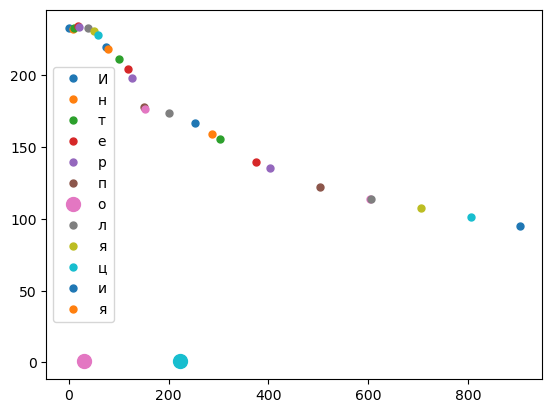

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange(xp, yp):
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (xp - x[j])/(x[i] - x[j])
    return yp == yp + p * y[i]

x = np.array([0, 8, 10, 19, 20, 30, 39, 50, 58, 75, 78, 101, 118, 126, 151, 153, 201, 222, 252, 287,
              302, 376, 403, 504, 603, 605, 706, 807, 904])
y = np.array([233, 232.5, 232.8, 234.1, 234, 0, 233, 231, 228.5, 220.1, 218.6, 211.2, 204.5, 198.2, 178.3, 176.7,
              173.6, 0, 166.8, 158.9, 155.7, 139.6, 135.4, 122.4, 114, 113.9, 107.8, 101.5, 95.4])

n = 29

for i in range(n):
    f = plt.plot(x[i], y[i], 'o', markersize=5)
    if y[i] == 0:
        y[i] = lagrange(x[i], y[i])
        print('Интерполированное значение в точке %.1f это %.1f.' % (x[i], y[i]))
        f = plt.plot(x[i], y[i], 'o', markersize=10)

f = plt.legend('Интерполяция')        
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange(A, B, x0, i):
    xp = x0
    yp = 0
    n = i
    for i0 in range(n):
        p = 1
        j = 0
        while j < i0:
            if i0 != j:
                p = p * (xp - A[j])/(A[i0] - A[j])
            j = j + 1
    return yp == yp + p * B[i0]

x = np.array([0, 8, 10, 19, 20, 30, 39, 50, 58, 75, 78, 101, 118, 126, 151, 153, 201, 222, 252, 287,
              302, 376, 403, 504, 603, 605, 706, 807, 904])
y = np.array([233, 232.5, 232.8, 234.1, 234, 0, 233, 231, 228.5, 220.1, 218.6, 211.2, 204.5, 198.2, 178.3, 176.7,
              173.6, 0, 166.8, 158.9, 155.7, 139.6, 135.4, 122.4, 114, 113.9, 107.8, 101.5, 95.4])

n = 29

A = np.zeros((n))
B = np.zeros((n))

for i in range(n):
    if y[i] == 0:
        A = x[:i]
        B = y[:i]
        x0 = x[i]
        y[i] = lagrange(A, B, x0, i)
        print('Интерполированное значение в точке %.1f это %.1f.' % (x[i], y[i]))
    else:
        A = x[:i]
        B = y[:i]

f = plt.plot(x[i], y[i], 'o', markersize=5)
f = plt.legend('Интерполяция')        
plt.show()